In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_score, recall_score, \
f1_score, precision_recall_curve, r2_score, log_loss
from sklearn.feature_extraction import DictVectorizer
from scipy.sparse import hstack
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split

data_train = pd.read_csv('gbm-data.csv')


In [2]:
X = data_train.drop('Activity', axis=1)
y = data_train['Activity']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

      Iter       Train Loss   Remaining Time 
         1           1.0190           15.24s
         2           0.9192           15.00s
         3           0.8272           18.24s
         4           0.7834           18.88s
         5           0.7109           18.17s
         6           0.6368           17.75s
         7           0.5797           17.19s
         8           0.5610           16.34s
         9           0.5185           15.62s
        10           0.4984           14.96s
        20           0.1999           12.32s
        30           0.1313           12.14s
        40           0.0790           11.08s
        50           0.0511           10.51s
        60           0.0352            9.59s
        70           0.0245            8.75s
        80           0.0162            8.03s
        90           0.0114            7.36s
       100           0.0077            7.37s
       200           0.0002            2.41s


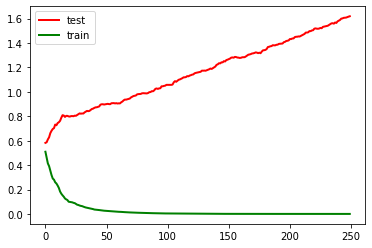

      Iter       Train Loss   Remaining Time 
         1           1.1255           17.01s
         2           1.0035           16.55s
         3           0.9386           16.06s
         4           0.8844           15.15s
         5           0.8381           14.21s
         6           0.7995           13.49s
         7           0.7559           13.10s
         8           0.7205           12.77s
         9           0.6958           12.54s
        10           0.6725           12.70s
        20           0.4672           11.67s
        30           0.3179           10.86s
        40           0.2274           10.23s
        50           0.1774            9.59s
        60           0.1394            9.04s
        70           0.1050            8.56s
        80           0.0805            8.04s
        90           0.0650            7.54s
       100           0.0511            7.00s
       200           0.0058            3.63s


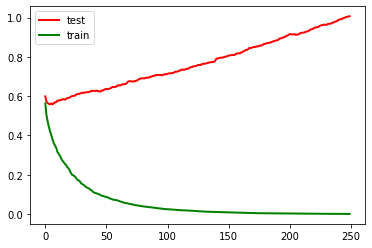

      Iter       Train Loss   Remaining Time 
         1           1.2095           10.99s
         2           1.1006           10.74s
         3           1.0240           10.46s
         4           0.9729           10.39s
         5           0.9387           10.25s
         6           0.8948           10.48s
         7           0.8621           10.89s
         8           0.8360           11.30s
         9           0.8171           11.73s
        10           0.7883           12.13s
        20           0.6029           10.97s
        30           0.4760           10.85s
        40           0.3879           10.08s
        50           0.3325            9.63s
        60           0.2759            9.59s
        70           0.2304            9.06s
        80           0.1969            8.44s
        90           0.1718            8.16s
       100           0.1404            7.69s
       200           0.0358            2.59s


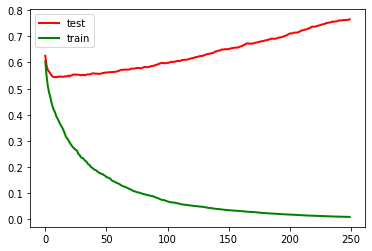

      Iter       Train Loss   Remaining Time 
         1           1.2613           20.58s
         2           1.1715           18.54s
         3           1.1009           16.18s
         4           1.0529           15.74s
         5           1.0130           15.10s
         6           0.9740           14.58s
         7           0.9475           14.19s
         8           0.9197           13.91s
         9           0.8979           13.75s
        10           0.8730           13.50s
        20           0.7207           11.95s
        30           0.6055           11.97s
        40           0.5244           11.19s
        50           0.4501           10.77s
        60           0.3908           10.36s
        70           0.3372            9.78s
        80           0.3009            9.19s
        90           0.2603            8.65s
       100           0.2327            8.20s
       200           0.0835            2.70s


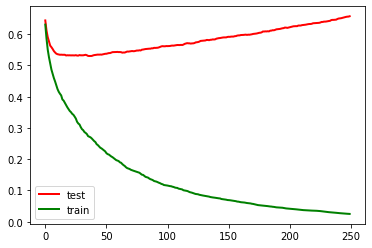

      Iter       Train Loss   Remaining Time 
         1           1.3199           13.01s
         2           1.2645           12.91s
         3           1.2170           12.60s
         4           1.1775           12.58s
         5           1.1404           12.57s
         6           1.1106           12.72s
         7           1.0844           12.68s
         8           1.0617           14.60s
         9           1.0411           15.43s
        10           1.0223           15.51s
        20           0.8864           15.26s
        30           0.7844           14.34s
        40           0.7176           13.75s
        50           0.6590           13.42s
        60           0.6120           12.54s
        70           0.5599           11.49s
        80           0.5242           10.53s
        90           0.4829            9.68s
       100           0.4473            8.92s
       200           0.2379            2.97s


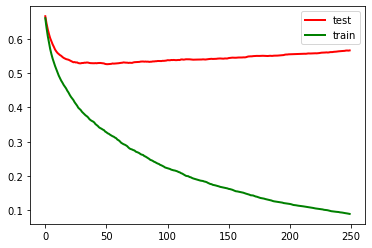

In [4]:
for lr in [1, 0.5, 0.3, 0.2, 0.1]:
    clf = GradientBoostingClassifier(n_estimators=250, learning_rate=lr, verbose=True, random_state=241)
    clf.fit(X_train, y_train)
    test_loss = list(range(250))
    train_loss = list(range(250))
    
    for i, dess in enumerate(clf.staged_decision_function(X_train)):
        dess = [item[0] for item in dess.tolist()]
        dess = [1/(1 + np.exp(-x)) for x in dess]
        train_loss[i] = log_loss(y_train, dess)

    for i, dess in enumerate(clf.staged_decision_function(X_test)):
        dess = [item[0] for item in dess.tolist()]
        dess = [1/(1 + np.exp(-x)) for x in dess]
        test_loss[i] = log_loss(y_test, dess)

    
    %matplotlib inline
    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    plt.show()


      Iter       Train Loss   Remaining Time 
         1           1.2613           14.09s
         2           1.1715           13.73s
         3           1.1009           14.18s
         4           1.0529           16.65s
         5           1.0130           17.68s
         6           0.9740           17.77s
         7           0.9475           19.44s
         8           0.9197           19.46s
         9           0.8979           18.88s
        10           0.8730           18.59s
        20           0.7207           18.73s
        30           0.6055           18.91s
        40           0.5244           16.57s
        50           0.4501           14.79s
        60           0.3908           13.52s
        70           0.3372           12.37s
        80           0.3009           11.85s
        90           0.2603           10.91s
       100           0.2327           10.10s
       200           0.0835            3.11s
0.5301645204906471
37


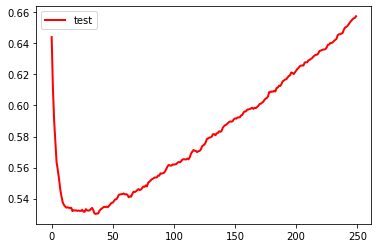

In [5]:
lr = 0.2
clf = GradientBoostingClassifier(n_estimators=250, learning_rate=lr, verbose=True, random_state=241)
clf.fit(X_train, y_train)
test_loss = list(range(250))
train_loss = list(range(250))

for i, dess in enumerate(clf.staged_decision_function(X_test)):
    dess = [item[0] for item in dess.tolist()]
    dess = [1/(1 + np.exp(-x)) for x in dess]
    test_loss[i] = log_loss(y_test, dess)

print(min(test_loss))
print(np.argmin(test_loss) + 1)

%matplotlib inline
plt.figure()
plt.plot(test_loss, 'r', linewidth=2)
plt.legend(['test'])
plt.show()


In [6]:
rf = RandomForestClassifier(n_estimators=37, random_state=241)
rf.fit(X_train, y_train)
log_loss(y_test, rf.predict_proba(X_test))


0.5410941951182815